In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [7]:
# Load the datasets

df_fake = pd.read_csv(r"C:\Users\vandana singh ranjan\AppData\Local\Temp\ec0a8d39-63c4-4001-b154-d55c230081cb_archive (1).zip.1cb\Fake.csv")  # Fake news dataset
df_real = pd.read_csv(r"C:\Users\vandana singh ranjan\AppData\Local\Temp\0c5abc77-d6a9-4834-8a45-3541778eb867_archive (1).zip.867\True.csv")  # Real news dataset

# Add labels
df_fake["label"] = 0  # Fake News → 0
df_real["label"] = 1  # Real News → 1

# Combine datasets
df = pd.concat([df_fake, df_real], axis=0)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Display dataset info
print(df.head())  # Print first 5 rows
print(df["label"].value_counts())  # Check class distribution


                                               title  \
0  Migrant deaths in the Sahara likely twice Medi...   
1   History Teacher Forces Students To Watch Film...   
2  Russian long-range bombers strike Islamic Stat...   
3   House Dem Wants GOP On Record: Stop Gov’t Spe...   
4  GERMANY KICKING RESIDENTS OUT To Make Way For ...   

                                                text    subject  \
0  GENEVA (Reuters) - West African migrants tryin...  worldnews   
1  A history teacher who openly ranted in the cla...       News   
2  MOSCOW/BEIRUT (Reuters) - Russian long-range b...  worldnews   
3  Early next month, the GOP-controlled House of ...       News   
4  Stories of governments removing citizens from ...  left-news   

                 date  label  
0   October 12, 2017       1  
1       April 1, 2016      0  
2  November 17, 2017       1  
3     August 24, 2017      0  
4        May 19, 2017      0  
label
0    23481
1    21417
Name: count, dtype: int64


In [9]:
import re
import string

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\[.*?\]', '', text)  
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>+', '', text) 
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    return text

# Apply cleaning function
df["text"] = df["text"].apply(clean_text)


In [10]:
X = df["text"] 
y = df["label"]  

# Split data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [14]:
# Train Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

# Train Naïve Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

# Train Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Predictions
y_pred_lr = model_lr.predict(X_test_tfidf)
y_pred_nb = model_nb.predict(X_test_tfidf)
y_pred_rf = model_rf.predict(X_test_tfidf)

# Accuracy Scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Reports
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Naïve Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.9878619153674832
Naïve Bayes Accuracy: 0.9239420935412027
Random Forest Accuracy: 0.9973273942093541
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4631
           1       0.98      0.99      0.99      4349

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Naïve Bayes Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      4631
           1       0.93      0.91      0.92      4349

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4631
           1       1.00      1.

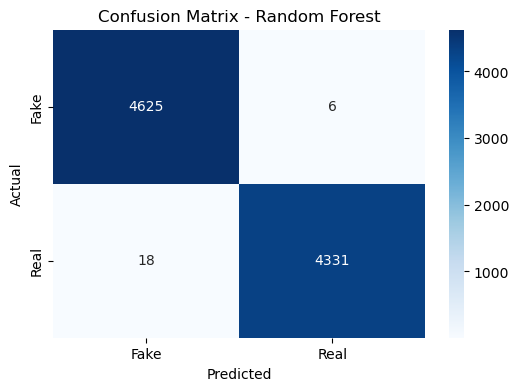

In [16]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)  # Change model as needed

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


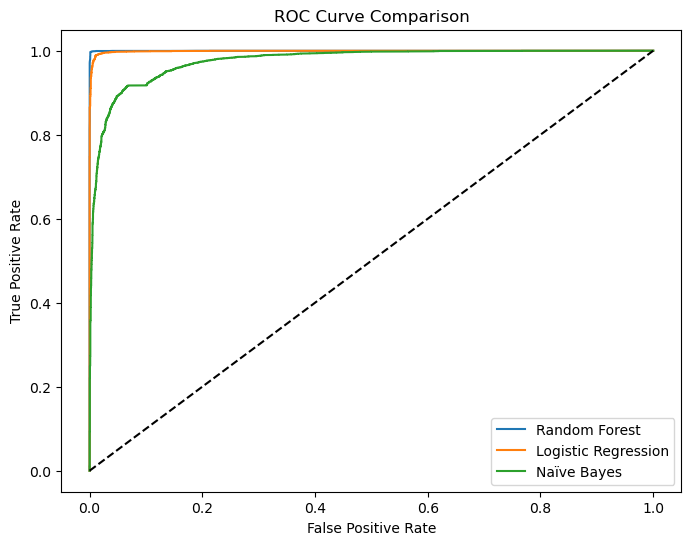

In [18]:
# Get probability scores
y_prob_rf = model_rf.predict_proba(X_test_tfidf)[:,1]
y_prob_lr = model_lr.predict_proba(X_test_tfidf)[:,1]
y_prob_nb = model_nb.predict_proba(X_test_tfidf)[:,1]

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_nb, tpr_nb, label="Naïve Bayes")
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


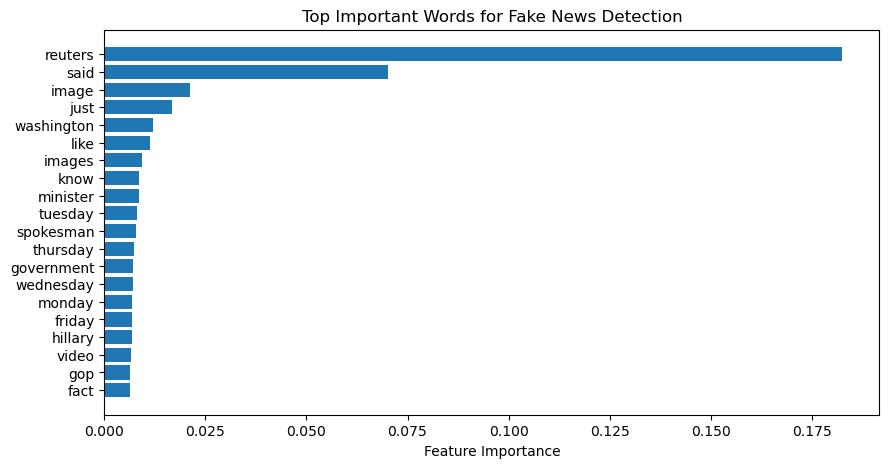

In [19]:
# Get feature importance from Random Forest
feature_importances = model_rf.feature_importances_
top_n = 20  # Show top 20 words

# Get top features
indices = np.argsort(feature_importances)[::-1][:top_n]
features = vectorizer.get_feature_names_out()

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top Important Words for Fake News Detection")
plt.gca().invert_yaxis()
plt.show()
